In [ ]:
import cytoreactors.modeling.EL222_model_2V_3P_A as model
from cytoreactors.modeling.simulation import simulate, simulate_analytic, light_profile_to_traj, light_profile_to_t_change
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
light_profile = [(40,0.1),(0,0.4),(40,0.1),(0,0.4), (40,2),(0,4),(40,1.5)]

In [ ]:
pars_1 = {'sigma':7700, 'deg_m':0.41, 'deg_fp':1.58}
pars_2 = {'sigma':2000, 'deg_m':1.58, 'deg_fp':0.41}

In [ ]:
y0 = [0,0]
plt.figure(figsize=(8,4))
ts,intensities = light_profile_to_traj(light_profile)
for pars in [pars_1,pars_2]:
    t_an, y_an, fp_an, _ = simulate_analytic(model=model, 
                  model_pars=pars, 
                  light_profile=light_profile,
                  y0=y0,
                  n_evals=31)
    plt.plot(t_an, y_an[-1], label=str(pars))
plt.legend()
plt.plot(ts,intensities*20,'b')

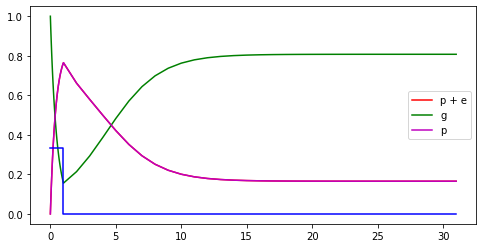

In [2]:
import cytoreactors.modeling.DIFF_model_growers_producers_V2 as model
from cytoreactors.modeling.simulation import light_profile_to_traj
import matplotlib.pyplot as plt

pars = model.default_model_pars.copy()
pars['dru'] = 2
pars['drh'] = 2

light_profile = [(40,1), (0,30)]
y0 = [1,0,0,0]
plt.figure(figsize=(8,4))
ts,intensities = light_profile_to_traj(light_profile)
t, y, p_and_e_at_edges, t_at_edges = model.simulate(model=model, 
                  model_pars=pars, 
                  light_profile=light_profile,
                  y0=y0,
                  n_evals=31)
plt.plot(t,y[1]+y[2],'r', label='p + e')
plt.plot(t,y[0],'g', label='g')
plt.plot(t,y[1],'m', label='p')
plt.plot(ts,intensities/120,'b')
plt.legend()

In [ ]:
pars['growth_defect_hill_conc'] = 100
pars['growth_defect_hill_exp'] = 5.

pars['prod_R_hill_conc'] = 300.
pars['prod_R_hill_exp'] = 8.
pars['R_action_rate'] = 0.5
pars['prod_R_basal'] = 0
pars['prod_R_max'] = 1.

pars['k_prod'] = 30

pars

In [ ]:
def study(pars):
    f,axs = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
    Pin = np.linspace(0.01,600,10000)
    n,c = pars['prod_R_hill_exp'],pars['prod_R_hill_conc']
    prod_R = (pars['prod_R_basal'] + (pars['prod_R_max']-pars['prod_R_basal']) * Pin**n / (Pin**n + c**n))
    n,c = pars['growth_defect_hill_exp'],pars['growth_defect_hill_conc']
    mu = pars['mu_max'] * c**n / (Pin**n + c**n)
        
    axs[0].plot(Pin, mu*Pin, 'r')
    axs[0].plot(Pin, [pars['k_prod']]*len(Pin), 'k')
    
    axs[1].plot(Pin, mu/pars['mu_max'], 'r')
    axs[1].plot(Pin, prod_R/pars['prod_R_max'], 'g')
    
    #R_ss_pin = (pars['k_prod']-mu*Pin) / pars['R_action_rate'] / Pin
    #axs[1].plot(Pin, R_ss_pin, 'g')
    
    #axs[2].plot(Pin, mu, 'r')
    #axs[2].plot(Pin, pars['k_prod']/Pin, 'g')
    #axs[2].set(xscale='log', yscale='log')

In [ ]:
study(pars)

In [ ]:
light_profile = [(0,20),(1,200)]
y0 = np.array([0,0])
t,y,_,_ = simulate(model=model, model_pars=pars, light_profile=light_profile, y0=y0, n_evals=231)
Pin,R = y
n,c = pars['growth_defect_hill_exp'],pars['growth_defect_hill_conc']
mu = pars['mu_max'] * c**n / (Pin**n + c**n)
f,axs = plt.subplots(ncols=1, nrows=3, figsize=(12,10))
axs[0].plot(t-20,mu,label='mu')
axs[1].plot(t-20,Pin,label='Pin')
axs[2].plot(t-20,R,label='R')
for ax in axs:
    ax.legend()
    ax.set(xlim=([0,100]))
axs[0].set(ylim=(0,pars['mu_max']*1.1));